# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [35]:
# Realizando a leitura da base de dados em csv
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [36]:
# Analisando informações do dataframe
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [37]:
# Criando um novo dataframe com 3 variáveis
sinasc_1 = sinasc_raw[['munResLat', 'munResNome', 'QTDGESTANT', 'QTDPARTNOR']]
sinasc_1.head()

,munResLat,munResNome,QTDGESTANT,QTDPARTNOR
0,-11.93554,Alta Floresta D'Oeste,0.0,0.0
1,-11.93554,Alta Floresta D'Oeste,1.0,0.0
2,-11.93554,Alta Floresta D'Oeste,2.0,1.0
3,-12.13178,Alto Alegre dos Parecis,0.0,0.0
4,-11.93554,Alta Floresta D'Oeste,1.0,0.0


In [38]:
# consultando o tipo de dados das variáveis
sinasc_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   munResLat   27027 non-null  float64
 1   munResNome  27028 non-null  object 
 2   QTDGESTANT  25816 non-null  float64
 3   QTDPARTNOR  25149 non-null  float64
dtypes: float64(3), object(1)
memory usage: 844.8+ KB


In [39]:
# Analisando a variável com valores acima de -10.5
sinasc_1_acima = sinasc_1[sinasc_1['munResLat'] > -10.5]
sinasc_1_acima.sort_values(by='munResLat', ascending=True)

,munResLat,munResNome,QTDGESTANT,QTDPARTNOR
18352,-10.43595,Jaru,2.0,2.0
17148,-10.43595,Jaru,1.0,0.0
17146,-10.43595,Jaru,1.0,0.0
3123,-10.43595,Jaru,0.0,0.0
17143,-10.43595,Jaru,0.0,0.0
...,...,...,...,...
8369,-8.76889,Porto Velho,4.0,4.0
8368,-8.76889,Porto Velho,0.0,0.0
6361,-8.76889,Porto Velho,2.0,2.0
6366,-8.76889,Porto Velho,2.0,2.0


In [40]:
# Analisando variável com variável abaixo de -10.5
sinasc_1_abaixo = sinasc_1[sinasc_1['munResLat'] <= -10.5]
sinasc_1_abaixo.sort_values(by='munResLat', ascending=True)

,munResLat,munResNome,QTDGESTANT,QTDPARTNOR
11425,-13.49976,Cabixi,0.0,0.0
25035,-13.49976,Cabixi,4.0,3.0
25020,-13.49976,Cabixi,4.0,0.0
25006,-13.49976,Cabixi,0.0,0.0
25927,-13.49976,Cabixi,0.0,0.0
...,...,...,...,...
14803,-10.56842,Campo Novo de Rondônia,2.0,0.0
14841,-10.56842,Campo Novo de Rondônia,1.0,0.0
14847,-10.56842,Campo Novo de Rondônia,1.0,0.0
14415,-10.56842,Campo Novo de Rondônia,3.0,3.0


In [41]:
# Analisando dataframe realizando groupby e com soma
sinasc_1.groupby('munResLat')[['QTDGESTANT', 'QTDPARTNOR']].sum()

,QTDGESTANT,QTDPARTNOR
munResLat,,
-13.49976,82.0,18.0
-13.47656,53.0,30.0
-13.19503,293.0,74.0
-13.13056,254.0,95.0
-12.99752,131.0,45.0
-12.74137,1813.0,522.0
-12.55684,184.0,62.0
-12.43601,351.0,185.0
-12.17983,56.0,19.0


In [42]:
# realizando a contagem de ocorrências para cada munResLat
sinasc_raw['munResLat'].value_counts().sort_values()

munResLat
-11.42684      32
-13.47656      40
-11.82571      43
-12.17983      44
-9.70554       50
-11.91439      54
-10.93217      64
-10.33887      75
-13.49976      80
-10.43105      81
-11.19624      84
-9.85139       93
-10.24873      97
-11.70974      98
-11.90842      99
-10.91553     104
-9.19187      109
-10.61207     112
-12.99752     127
-12.13178     154
-12.55684     162
-11.04561     164
-10.56842     166
-11.76712     168
-11.12855     170
-10.26310     199
-9.37819      205
-11.34413     205
-13.13056     214
-9.71667      226
-12.43601     233
-13.19503     237
-11.72133     261
-12.06380     303
-11.17321     304
-8.78502      337
-11.69949     353
-11.93554     367
-10.41177     432
-11.52855     450
-9.42556      500
-10.20981     583
-11.67754     616
-10.72357     631
-10.77388     781
-10.43595     881
-11.72226     927
-11.43387    1374
-12.74137    1590
-9.90846     1729
-10.88205    2182
-8.76889     8437
Name: count, dtype: int64

In [43]:
# Transformando os valores da variável para true os valores acima de -10.5 e false para abaixo de -10.5
sinasc_raw['munResLat'] = sinasc_raw['munResLat'] > -10.5
sinasc_raw['munResLat'].value_counts()

munResLat
True     14034
False    12994
Name: count, dtype: int64

In [44]:
# Consultado daframe com os valores atualizados dentro da variável
sinasc_11 = sinasc_raw[['munResLat', 'QTDGESTANT', 'QTDPARTNOR']]
sinasc_11.head()

,munResLat,QTDGESTANT,QTDPARTNOR
0,False,0.0,0.0
1,False,1.0,0.0
2,False,2.0,1.0
3,False,0.0,0.0
4,False,1.0,0.0


In [45]:
# Validando alteração nos valores dentro da variável
sinasc_11['munResLat'].value_counts()

munResLat
True     14034
False    12994
Name: count, dtype: int64

In [46]:
# Criando novo dataframe passando o valores da variável 'munResLat' como índice das linhas, aplicando o mapping e criando apenas 
# duas faixas de índices, e por último realizando o groupby para as duas faixas
sinasc_10 = sinasc_11.set_index('munResLat')
mapping = {
    True: 'Acima de -10.5',
    False: 'Abaixo de -10.5'
}
sinasc_12 = sinasc_10.groupby(mapping).sum()
sinasc_12

,QTDGESTANT,QTDPARTNOR
munResLat,,
Abaixo de -10.5,15303.0,5801.0
Acima de -10.5,17615.0,8771.0


In [47]:
# Realizando uma primeira tentativa para realizar as operações com as duas variáveis
sinasc_12.agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,QTDGESTANT,QTDPARTNOR
sum,3.291800e+04,1.457200e+04
mean,1.645900e+04,7.286000e+03
min,1.530300e+04,5.801000e+03
max,1.761500e+04,8.771000e+03
median,1.645900e+04,7.286000e+03
std,1.634831e+03,2.100107e+03
var,2.672672e+06,4.410450e+06


In [48]:
# Estatísticas resumidas para as duas variáveis
# Considerando também as duas faixas como chaves para o agrupamento
sinasc_13 = sinasc_10.groupby(mapping).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
sinasc_13

QTDGESTANT                                                  \
                       sum      mean  min   max median       std       var   
munResLat                                                                    
Abaixo de -10.5    15303.0  1.186095  0.0  15.0    1.0  1.304746  1.702363   
Acima de -10.5     17615.0  1.364024  0.0  52.0    1.0  1.492482  2.227501   

                QTDPARTNOR                                                  
                       sum      mean  min   max median       std       var  
munResLat                                                                   
Abaixo de -10.5     5801.0  0.452284  0.0  41.0    0.0  1.123393  1.262012  
Acima de -10.5      8771.0  0.711759  0.0  40.0    0.0  1.279042  1.635949

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [49]:
# Criando dataframe reduzido com as variáveis de interesse
sinasc_2 = sinasc_raw[['munResArea', 'munResNome', 'QTDPARTNOR', 'RACACORMAE']]
sinasc_2.sort_values(by='munResArea', ascending=False)

,munResArea,munResNome,QTDPARTNOR,RACACORMAE
6287,34096.394,Porto Velho,1.0,4.0
6919,34096.394,Porto Velho,NaN,4.0
6941,34096.394,Porto Velho,1.0,4.0
6942,34096.394,Porto Velho,1.0,4.0
6943,34096.394,Porto Velho,4.0,4.0
...,...,...,...,...
19290,459.978,Teixeirópolis,0.0,1.0
19205,459.978,Teixeirópolis,0.0,4.0
19293,459.978,Teixeirópolis,0.0,1.0
5469,459.978,Teixeirópolis,0.0,4.0


In [50]:
# Analisando variável
sinasc_raw['munResArea'].value_counts().head()

munResArea
34096.394    8437
6896.648     2182
4426.571     1729
11518.915    1590
3792.998     1374
Name: count, dtype: int64

In [51]:
# Consultando variável maior que 3000
sinasc_2_acima = sinasc_2[sinasc_2['munResArea'] > 3000]
sinasc_2_acima.head()

,munResArea,munResNome,QTDPARTNOR,RACACORMAE
0,7067.025,Alta Floresta D'Oeste,0.0,1.0
1,7067.025,Alta Floresta D'Oeste,0.0,1.0
2,7067.025,Alta Floresta D'Oeste,1.0,1.0
3,3958.273,Alto Alegre dos Parecis,0.0,4.0
4,7067.025,Alta Floresta D'Oeste,0.0,4.0


In [52]:
# Transformando valores da variável acima da faixa desejada
sinasc_raw['munResArea'] = sinasc_raw['munResArea'] > 3000

In [53]:
# Analisando variável com novos valores
sinasc_raw['munResArea']

0         True
1         True
2         True
3         True
4         True
         ...  
27023     True
27024     True
27025     True
27026     True
27027    False
Name: munResArea, Length: 27028, dtype: bool

In [54]:
# Analisando dataframe atualizado
sinasc_2 = sinasc_raw[['munResArea', 'QTDPARTNOR', 'RACACORMAE']]
sinasc_2

,munResArea,QTDPARTNOR,RACACORMAE
0,True,0.0,1.0
1,True,0.0,1.0
2,True,1.0,1.0
3,True,0.0,4.0
4,True,0.0,4.0
...,...,...,...
27023,True,1.0,1.0
27024,True,0.0,1.0
27025,True,0.0,4.0
27026,True,0.0,4.0


In [55]:
# Alterando índice do dataframe
sinasc_20 = sinasc_2.set_index('munResArea')
sinasc_20

,QTDPARTNOR,RACACORMAE
munResArea,,
True,0.0,1.0
True,0.0,1.0
True,1.0,1.0
True,0.0,4.0
True,0.0,4.0
...,...,...
True,1.0,1.0
True,0.0,1.0
True,0.0,4.0


In [56]:
# Utilizando mapping para cria duas faixas como chave no dataframe
mapping = {
    True: 'Acima de 3000',
    False: 'Abaixo de 3000'
}
sinasc_21 = sinasc_20.groupby(mapping).sum()
sinasc_21

,QTDPARTNOR,RACACORMAE
munResArea,,
Abaixo de 3000,1913.0,15959.0
Acima de 3000,12659.0,71928.0


In [57]:
# Analisando totais para cada faixa da variável
sinasc_raw['RACACORMAE'].value_counts()

RACACORMAE
4.0    19587
1.0     5382
2.0      867
5.0      415
3.0      116
Name: count, dtype: int64

In [58]:
# Realizando as operações com as duas variáveis e para as duas faixas como chave
sinasc_22 = sinasc_20.groupby(mapping).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
sinasc_22

QTDPARTNOR                                                  \
                      sum      mean  min   max median       std       var   
munResArea                                                                  
Abaixo de 3000     1913.0  0.371456  0.0  10.0    0.0  0.856402  0.733425   
Acima de 3000     12659.0  0.632982  0.0  41.0    0.0  1.278932  1.635668   

               RACACORMAE                                                 
                      sum      mean  min  max median       std       var  
munResArea                                                                
Abaixo de 3000    15959.0  3.149595  1.0  5.0    4.0  1.315777  1.731269  
Acima de 3000     71928.0  3.376901  1.0  5.0    4.0  1.220593  1.489846

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [59]:
# Analisando qtde de valores únicos na variável 
sinasc_raw['munResAlt'].value_counts()

munResAlt
87.0     8437
157.0    2182
139.0    1729
595.0    1590
177.0    1374
227.0     927
163.0     881
186.0     784
133.0     781
263.0     687
252.0     631
153.0     583
144.0     500
151.0     432
191.0     417
338.0     367
85.0      337
178.0     304
166.0     303
259.0     261
145.0     233
128.0     226
419.0     214
111.0     205
182.0     205
155.0     199
197.0     170
206.0     166
212.0     164
340.0     162
397.0     154
269.0     127
202.0     112
99.0      109
241.0     104
265.0      99
230.0      98
192.0      97
158.0      93
266.0      84
154.0      81
236.0      80
161.0      75
270.0      54
124.0      50
296.0      44
245.0      43
170.0      40
215.0      32
Name: count, dtype: int64

In [60]:
# Transformando valores da variável acima da faixa desejada
sinasc_raw['munResAlt'] = sinasc_raw['munResAlt'] > 100

In [61]:
# Validando alteração
sinasc_raw['munResAlt']

0        True
1        True
2        True
3        True
4        True
         ... 
27023    True
27024    True
27025    True
27026    True
27027    True
Name: munResAlt, Length: 27028, dtype: bool

In [62]:
# Criando dataframe reduzido com as variáveis de interesse
sinasc_3 = sinasc_raw[['munResAlt', 'TPNASCASSI', 'TPFUNCRESP']]
sinasc_3.head()

,munResAlt,TPNASCASSI,TPFUNCRESP
0,True,1.0,2.0
1,True,1.0,5.0
2,True,1.0,2.0
3,True,1.0,2.0
4,True,1.0,2.0


In [63]:
# Alterando índice do dataframe
sinasc_31 = sinasc_3.set_index('munResAlt')
sinasc_31

,TPNASCASSI,TPFUNCRESP
munResAlt,,
True,1.0,2.0
True,1.0,5.0
True,1.0,2.0
True,1.0,2.0
True,1.0,2.0
...,...,...
True,1.0,2.0
True,1.0,2.0
True,1.0,5.0


In [65]:
# Utilizando mapping para cria duas faixas como chave no dataframe
mapping = {
    True: 'Acima de 100',
    False: 'Abaixo de 100'
}
sinasc_32 = sinasc_31.groupby(mapping).sum()
sinasc_32

,TPNASCASSI,TPFUNCRESP
munResAlt,,
Abaixo de 100,10432.0,17701.0
Acima de 100,20478.0,50841.0


In [67]:
# Realizando as operações com as duas variáveis e para as duas faixas como chave
sinasc_33 = sinasc_31.groupby(mapping).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
sinasc_33

TPNASCASSI                                                 \
                     sum      mean  min  max median       std       var   
munResAlt                                                                 
Abaixo de 100    10432.0  1.177294  1.0  9.0    1.0  0.467266  0.218338   
Acima de 100     20478.0  1.131006  1.0  9.0    1.0  0.402372  0.161903   

              TPFUNCRESP                                                 
                     sum      mean  min  max median       std       var  
munResAlt                                                                
Abaixo de 100    17701.0  1.996278  1.0  5.0    2.0  0.648523  0.420582  
Acima de 100     50841.0  2.809826  1.0  5.0    2.0  1.336465  1.786139

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [68]:
# Criando dataframe reduzido com as variáveis de interesse
sinasc_4 = sinasc_raw[['DTNASC', 'IDADEMAE', 'munResNome']]
sinasc_4

,DTNASC,IDADEMAE,munResNome
0,2019-02-19,19,Alta Floresta D'Oeste
1,2019-02-21,29,Alta Floresta D'Oeste
2,2019-02-25,37,Alta Floresta D'Oeste
3,2019-03-20,30,Alto Alegre dos Parecis
4,2019-03-23,30,Alta Floresta D'Oeste
...,...,...,...
27023,2019-12-13,32,Vilhena
27024,2019-10-04,19,Chupinguaia
27025,2019-08-02,24,Vilhena
27026,2019-12-23,21,Vilhena


In [69]:
# Criando dicionário com cada região imediata de rondonia
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [70]:
# Criando nova variável com valores utilizando a função map com os valores correspondentes no dicionário e na coluna 'munResNome'
sinasc_raw['Imediata'] = sinasc_raw['munResNome'].map(imediatas)

In [71]:
# Analisando dataframe
sinasc_41 = sinasc_raw[['DTNASC', 'Imediata', 'IDADEMAE']]
sinasc_41

,DTNASC,Imediata,IDADEMAE
0,2019-02-19,Cacoal,19
1,2019-02-21,Cacoal,29
2,2019-02-25,Cacoal,37
3,2019-03-20,Cacoal,30
4,2019-03-23,Cacoal,30
...,...,...,...
27023,2019-12-13,Vilhena,32
27024,2019-10-04,Vilhena,19
27025,2019-08-02,Vilhena,24
27026,2019-12-23,Vilhena,21


In [72]:
# Analisando o dataframe com groupby passando 2 colunas como chave
sinasc_41.groupby(['DTNASC', 'Imediata'])['IDADEMAE'].count()

DTNASC      Imediata   
2019-01-01  Ariquemes       5
            Cacoal          8
            Jaru            2
            Ji-Paraná       7
            Porto Velho    18
                           ..
2019-12-31  Cacoal         10
            Jaru            6
            Ji-Paraná       5
            Porto Velho    20
            Vilhena         7
Name: IDADEMAE, Length: 2181, dtype: int64

In [73]:
# Utilizando o unstack passando o primeiro nível da linha em coluna
sinasc_41.groupby(['DTNASC', 'Imediata'])['IDADEMAE'].count().unstack()

Imediata,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
DTNASC,,,,,,
2019-01-01,5.0,8.0,2.0,7.0,18.0,8.0
2019-01-02,12.0,9.0,5.0,11.0,20.0,11.0
2019-01-03,7.0,13.0,2.0,11.0,36.0,8.0
2019-01-04,9.0,13.0,2.0,16.0,27.0,6.0
2019-01-05,9.0,5.0,4.0,20.0,28.0,5.0
...,...,...,...,...,...,...
2019-12-27,9.0,14.0,3.0,15.0,39.0,4.0
2019-12-28,6.0,9.0,6.0,8.0,24.0,6.0
2019-12-29,6.0,10.0,3.0,8.0,17.0,4.0


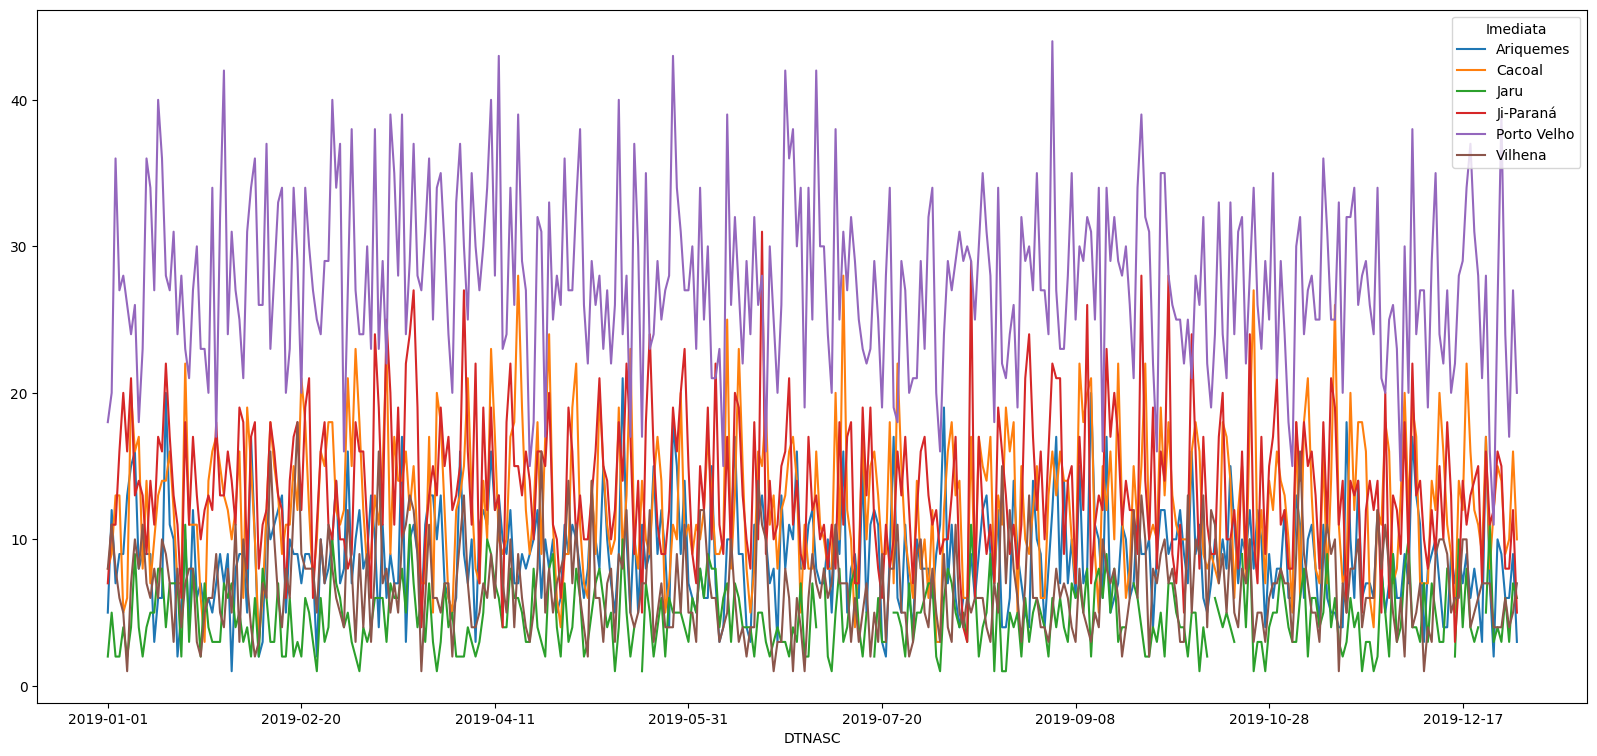

In [74]:
# Plotando o gráfico
sinasc_41.groupby(['DTNASC', 'Imediata'])['IDADEMAE'].count().unstack().plot(figsize=[20,9]);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [75]:
# Acessando a base IDH no Dataframe
df_idh = pd.read_csv('ex_51a.csv', sep=';')
df_idh.head()

,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação
0,1,Porto Velho,0.736,0.764,0.819,0.638
1,2,Vilhena,0.731,0.734,0.808,0.659
2,3,Cacoal,0.718,0.727,0.821,0.620
3,4,Ji-Paraná,0.714,0.728,0.810,0.617
4,5,Pimenta Bueno,0.710,0.726,0.803,0.613


In [76]:
# Consultando os nomes da colunas para renomear seus nomes
nomes_variaveis = list(df_idh.columns)
nomes_variaveis[2]

'IDH municipal'

In [77]:
# Utilizando columns para renomear a coluna
nomes_variaveis[2] = 'idh_municipal'
df_idh.columns = nomes_variaveis
df_idh.head()

,Posição,Município,idh_municipal,IDH renda,IDH longevidade,IDH educação
0,1,Porto Velho,0.736,0.764,0.819,0.638
1,2,Vilhena,0.731,0.734,0.808,0.659
2,3,Cacoal,0.718,0.727,0.821,0.620
3,4,Ji-Paraná,0.714,0.728,0.810,0.617
4,5,Pimenta Bueno,0.710,0.726,0.803,0.613


In [78]:
# Utilizando o método rename()
df_idh.rename(columns={
    'Posição': 'posicao',
    'Município': 'municipio',
    'IDH renda': 'idh_renda',
    'IDH longevidade': 'idh_longevidade',
    'IDH educação': 'idh_educacao'
}, inplace=True)
df_idh.head()

,posicao,municipio,idh_municipal,idh_renda,idh_longevidade,idh_educacao
0,1,Porto Velho,0.736,0.764,0.819,0.638
1,2,Vilhena,0.731,0.734,0.808,0.659
2,3,Cacoal,0.718,0.727,0.821,0.620
3,4,Ji-Paraná,0.714,0.728,0.810,0.617
4,5,Pimenta Bueno,0.710,0.726,0.803,0.613


In [79]:
df_idh.head()

,posicao,municipio,idh_municipal,idh_renda,idh_longevidade,idh_educacao
0,1,Porto Velho,0.736,0.764,0.819,0.638
1,2,Vilhena,0.731,0.734,0.808,0.659
2,3,Cacoal,0.718,0.727,0.821,0.620
3,4,Ji-Paraná,0.714,0.728,0.810,0.617
4,5,Pimenta Bueno,0.710,0.726,0.803,0.613


In [80]:
df_idh2 = df_idh.set_index('municipio')
df_idh2.head()

,posicao,idh_municipal,idh_renda,idh_longevidade,idh_educacao
municipio,,,,,
Porto Velho,1,0.736,0.764,0.819,0.638
Vilhena,2,0.731,0.734,0.808,0.659
Cacoal,3,0.718,0.727,0.821,0.620
Ji-Paraná,4,0.714,0.728,0.810,0.617
Pimenta Bueno,5,0.710,0.726,0.803,0.613


In [81]:
mapping = {
    "Porto Velho": "IDH-M alto",
    "Vilhena": "IDH-M alto",
    "Cacoal": "IDH-M alto",
    "Ji-Paraná": "IDH-M alto",
    "Pimenta Bueno": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Rolim de Moura": "IDH-M alto",
    "Cerejeiras": "IDH-M medio",
    "Jaru": "IDH-M medio",
    "Colorado do Oeste": "IDH-M medio",
    "Ouro Preto do Oeste": "IDH-M medio",
    "Espigão d'Oeste": "IDH-M medio",
    "Santa Luzia d'Oeste": "IDH-M medio",
    "Pimenteiras do Oeste": "IDH-M medio",
    "Presidente Médici": "IDH-M medio",
    "Castanheiras": "IDH-M medio",
    "Guajará-Mirim": "IDH-M medio",
    "Chupinguaia": "IDH-M medio",
    "Cabixi": "IDH-M medio",
    "Candeias do Jamari": "IDH-M medio",
    "São Felipe d'Oeste": "IDH-M medio",
    "Cacaulândia": "IDH-M medio",
    "São Miguel do Guaporé": "IDH-M medio",
    "Mirante da Serra": "IDH-M medio",
    "Alvorada d'Oeste": "IDH-M medio",
    "Teixeirópolis": "IDH-M medio",
    "Nova Brasilândia d'Oeste": "IDH-M medio",
    "Rio Crespo": "IDH-M medio",
    "Primavera de Rondônia": "IDH-M medio",
    "Alta Floresta d'Oeste": "IDH-M medio",
    "Ministro Andreazza": "IDH-M medio",
    "Novo Horizonte do Oeste": "IDH-M medio",
    "Vale do Paraíso": "IDH-M medio",
    "Alto Paraíso": "IDH-M medio",
    "Parecis": "IDH-M medio",
    "Buritis": "IDH-M medio",
    "Itapuã do Oeste": "IDH-M medio",
    "Corumbiara": "IDH-M medio",
    "Cujubim": "IDH-M medio",
    "Costa Marques": "IDH-M medio",
    "São Francisco do Guaporé": "IDH-M medio",
    "Urupá": "IDH-M medio",
    "Monte Negro": "IDH-M medio",
    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho d'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Nova Mamoré": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo"
}

In [83]:
df_idh2.groupby([mapping])[['idh_municipal','idh_renda', 'idh_longevidade', 'idh_educacao']].agg(['mean', 'std', 'median', 'max', 'min'])

idh_municipal                                idh_renda            \
                     mean       std median    max    min      mean       std   
municipio                                                                      
IDH-M alto       0.715857  0.013668  0.714  0.736  0.700  0.729143  0.017478   
IDH-M baixo      0.591333  0.004848  0.592  0.598  0.584  0.627222  0.019104   
IDH-M medio      0.643250  0.024046  0.643  0.692  0.607  0.652111  0.022028   

                                  idh_longevidade                          \
             median    max    min            mean       std median    max   
municipio                                                                   
IDH-M alto   0.7270  0.764  0.709        0.810714  0.006726  0.808  0.821   
IDH-M baixo  0.6260  0.667  0.603        0.764444  0.010001  0.762  0.779   
IDH-M medio  0.6535  0.691  0.604        0.790667  0.024173  0.799  0.825   

                   idh_educacao                                 
               min         mean       std median    max    min  
municipio                                                       
IDH-M alto   0.803     0.620714  0.021538  0.617  0.659  0.598  
IDH-M baixo  0.753     0.431667  0.013955  0.434  0.446  0.404  
IDH-M medio  0.751     0.517333  0.039888  0.516  0.602  0.439

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [84]:
# Acessando a base IDH no Dataframe
df_ifdm = pd.read_csv('ifdm2.csv', sep=';')
df_ifdm.head()

,posicao,municipio,IFDM_2013
0,1,Ariquemes,0.7746
1,2,Vilhena,0.7465
2,3,Pimenta Bueno,0.7383
3,4,Porto Velho,0.7257
4,5,Ji-Paraná,0.7117


In [85]:
mapping = {
    "Ariquemes": "Desenvolvimento moderado",
    "Vilhena": "Desenvolvimento moderado",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Porto Velho": "Desenvolvimento moderado",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Cacoal": "Desenvolvimento moderado",
    "Santa Luzia d'Oeste": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Chupinguaia": "Desenvolvimento moderado",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    "Pimenteiras do Oeste": "Desenvolvimento moderado",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Jaru": "Desenvolvimento moderado",
    "Rio Crespo": "Desenvolvimento moderado",
    "Primavera de Rondônia": "Desenvolvimento moderado",
    "Alta Floresta d'Oeste": "Desenvolvimento moderado",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "Candeias do Jamari": "Desenvolvimento moderado",
    "Buritis": "Desenvolvimento moderado",
    "São Felipe d'Oeste": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "Cerejeiras": "Desenvolvimento moderado",
    "Monte Negro": "Desenvolvimento moderado",
    "Urupá": "Desenvolvimento moderado",
    "Espigão d'Oeste": "Desenvolvimento regular",
    "Seringueiras": "Desenvolvimento regular",
    "Alvorada d'Oeste": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Cabixi": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Nova Brasilândia d'Oeste": "Desenvolvimento regular",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Corumbiara": "Desenvolvimento regular",
    "Alto Paraíso": "Desenvolvimento regular",
    "Cacaulândia": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Mirante da Serra": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Castanheiras": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Machadinho d'Oeste": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Governador Jorge Teixeira": "Desenvolvimento regular"
}

In [86]:
df_ifdm2 = df_ifdm.set_index('municipio')
df_ifdm2.head()

,posicao,IFDM_2013
municipio,,
Ariquemes,1,0.7746
Vilhena,2,0.7465
Pimenta Bueno,3,0.7383
Porto Velho,4,0.7257
Ji-Paraná,5,0.7117


In [88]:
df_ifdm2.groupby([mapping])['IFDM_2013'].agg(['mean', 'std', 'median', 'max', 'min'])

,mean,std,median,max,min
municipio,,,,,
Desenvolvimento moderado,0.659919,0.048485,0.64615,0.7746,0.6006
Desenvolvimento regular,0.556362,0.034401,0.56415,0.5973,0.4562


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [89]:
# Acessando a base PIB no Dataframe
df_pib = pd.read_csv('PIB.csv', sep=';')
df_pib.head()

,posicao_2019,Unnamed: 1,municipio,PIB
0,1,(0),Porto Velho,17 912 070
1,2,(0),Ji-Paraná,3 783 972
2,3,(0),Vilhena,2 831 175
3,4,(0),Ariquemes,2 579 830
4,5,(0),Cacoal,2 261 644


In [90]:
# Removendo espaços em branco e substituindo ',' por '' na coluna 'PIB', em seguida, convertendo para float
df_pib['PIB'] = df_pib['PIB'].str.replace(' ', '').str.replace(',', '').astype(float)

In [91]:
df_pib.head()

,posicao_2019,Unnamed: 1,municipio,PIB
0,1,(0),Porto Velho,17912070.0
1,2,(0),Ji-Paraná,3783972.0
2,3,(0),Vilhena,2831175.0
3,4,(0),Ariquemes,2579830.0
4,5,(0),Cacoal,2261644.0


In [92]:
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   posicao_2019  52 non-null     int64  
 1   Unnamed: 1    52 non-null     object 
 2   municipio     52 non-null     object 
 3   PIB           52 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ KB


In [93]:
# Categorizando as faixas do PIB
df_pib.loc[df_pib['PIB'] <= 100000.0, 'PIB_Classificacao'] = 'Até 100 mil'
df_pib.loc[(df_pib['PIB'] > 100000.0) & (df_pib['PIB'] <= 200000.0), 'PIB_Classificacao'] = '100 mil a 200 mil'
df_pib.loc[(df_pib['PIB'] > 200000.0) & (df_pib['PIB'] <= 300000.0), 'PIB_Classificacao'] = '200 mil a 300 mil'
df_pib.loc[(df_pib['PIB'] > 300000.0) & (df_pib['PIB'] <= 500000.0), 'PIB_Classificacao'] = '300 mil a 500 mil'
df_pib.loc[(df_pib['PIB'] > 500000.0) & (df_pib['PIB'] <= 1000000.0), 'PIB_Classificacao'] = 'Acima de 500 mil'
df_pib.loc[df_pib['PIB'] > 1000000.0, 'PIB_Classificacao'] = 'Acima de 1 Bilhão'
df_pib.head()

,posicao_2019,Unnamed: 1,municipio,PIB,PIB_Classificacao
0,1,(0),Porto Velho,17912070.0,Acima de 1 Bilhão
1,2,(0),Ji-Paraná,3783972.0,Acima de 1 Bilhão
2,3,(0),Vilhena,2831175.0,Acima de 1 Bilhão
3,4,(0),Ariquemes,2579830.0,Acima de 1 Bilhão
4,5,(0),Cacoal,2261644.0,Acima de 1 Bilhão


In [94]:
df_pib.rename(columns={df_pib.columns[1]: 'mudanca'}, inplace=True)
df_pib.head()

,posicao_2019,mudanca,municipio,PIB,PIB_Classificacao
0,1,(0),Porto Velho,17912070.0,Acima de 1 Bilhão
1,2,(0),Ji-Paraná,3783972.0,Acima de 1 Bilhão
2,3,(0),Vilhena,2831175.0,Acima de 1 Bilhão
3,4,(0),Ariquemes,2579830.0,Acima de 1 Bilhão
4,5,(0),Cacoal,2261644.0,Acima de 1 Bilhão


In [95]:
df_pib2 = df_pib.set_index('PIB_Classificacao')
df_pib2.head()

,posicao_2019,mudanca,municipio,PIB
PIB_Classificacao,,,,
Acima de 1 Bilhão,1,(0),Porto Velho,17912070.0
Acima de 1 Bilhão,2,(0),Ji-Paraná,3783972.0
Acima de 1 Bilhão,3,(0),Vilhena,2831175.0
Acima de 1 Bilhão,4,(0),Ariquemes,2579830.0
Acima de 1 Bilhão,5,(0),Cacoal,2261644.0


In [96]:
df_pib2_filter = df_pib2.loc[df_pib2.index == 'Acima de 1 Bilhão']
df_pib2_filter

,posicao_2019,mudanca,municipio,PIB
PIB_Classificacao,,,,
Acima de 1 Bilhão,1,(0),Porto Velho,17912070.0
Acima de 1 Bilhão,2,(0),Ji-Paraná,3783972.0
Acima de 1 Bilhão,3,(0),Vilhena,2831175.0
Acima de 1 Bilhão,4,(0),Ariquemes,2579830.0
Acima de 1 Bilhão,5,(0),Cacoal,2261644.0
Acima de 1 Bilhão,6,(0),Jaru,1500890.0
Acima de 1 Bilhão,7,(0),Rolim de Moura,1283434.0
Acima de 1 Bilhão,8,(0),Pimenta Bueno,1164877.0


In [98]:
df_pib2.groupby('PIB_Classificacao')['PIB'].agg(['mean', 'std', 'median', 'max', 'min'])

,mean,std,median,max,min
PIB_Classificacao,,,,,
100 mil a 200 mil,1.478447e+05,2.815915e+04,144314.0,190331.0,105208.0
200 mil a 300 mil,2.113702e+05,6.431706e+03,211115.5,219152.0,204098.0
300 mil a 500 mil,3.878571e+05,5.625960e+04,360000.0,496000.0,335000.0
Acima de 1 Bilhão,4.164736e+06,5.624479e+06,2420737.0,17912070.0,1164877.0
Acima de 500 mil,6.567778e+05,1.350146e+05,625000.0,893000.0,507000.0
Até 100 mil,7.294688e+04,1.220983e+04,74422.5,92346.0,52908.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Segue mais alguns insights encontrados com os dados analisádos:

1) Nas cidades ao Sul de Rondônia, com coordenadas abaixo de -10.5, notamos uma menor quantidade de gestantes, possivelmente refletindo a distância em relação à capital ou uma região com menor PIB.

2) Já nas cidades ao Norte de Rondônia, acima de -10.5, observamos um maior número de gestantes, sugerindo proximidade da capital ou regiões com maior PIB.

3) Observamos a predominância da população em Rondônia das raças Amarela e Parda.

4) A média de nascimentos assistidos por médicos foi identificada como um ponto relevante.

5) É possível observar que a responsabilidade pelo preenchimento no parto recai principalmente sobre enfermeiros.

6) Porto Velho é a cidade com a maior idade média das mães

7) Verificamos que cidades com maior PIB tem impacto positivo no índice de desenvolvimento humano (IDH)

8) Surpreendentemente, ao avaliar o Índice Firjan de Desenvolvimento Municipal (IFDM), percebemos que o PIB da cidade não é um fator tão determinante quanto em outras avaliações.